## Predicting House Prices with Linear Regression

## Data Collection

In [66]:
import pandas as pd
df = pd.read_csv('Housing.csv')

# Display the first few rows
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data Exploration and Cleaning

In [59]:
# Check for missing values and data types
df.info()

# Summary statistics of the dataset
df.describe()

# Filling missing values only for numeric columns with their mean
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## Feature Selection

In [61]:
# Identify the features (X) and the target (y)
# Assume the target variable is 'Price' (change it to the actual target column in your dataset)
X = df.drop(columns=['price'])  # Drop target column
y = df['price']  # Target column

## Model Training

In [63]:
# Convert categorical columns to numerical values using Label Encoding
label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':  # Check if the column is categorical
        X[column] = label_encoder.fit_transform(X[column])

# Alternatively, use One-Hot Encoding if there are multiple categories
# X = pd.get_dummies(X, drop_first=True)

# Model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict the target on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1771751116594.035
R-squared: 0.6494754192267804


## Visualization

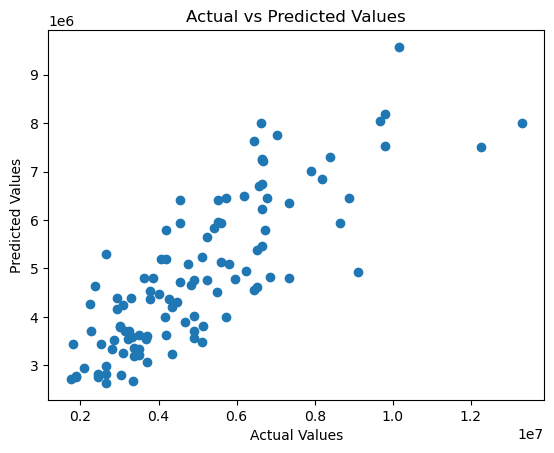

In [53]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()